In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import json
import pprint
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append('../')
from map import Map
from optimizer import *
from tools import *

plt.rcParams['figure.figsize'] = [24, 16] # default is [6.0, 4.0], good value is [24, 16]
plt.rcParams['figure.dpi'] = 50 # default is 72, good value is 50

In [2]:
# Select data here
case = "aiguillemidi3"

In [3]:
# Load data file
casedir = Path("../data/") / case
with open(casedir / "info.json") as info:
    data = json.load(info)

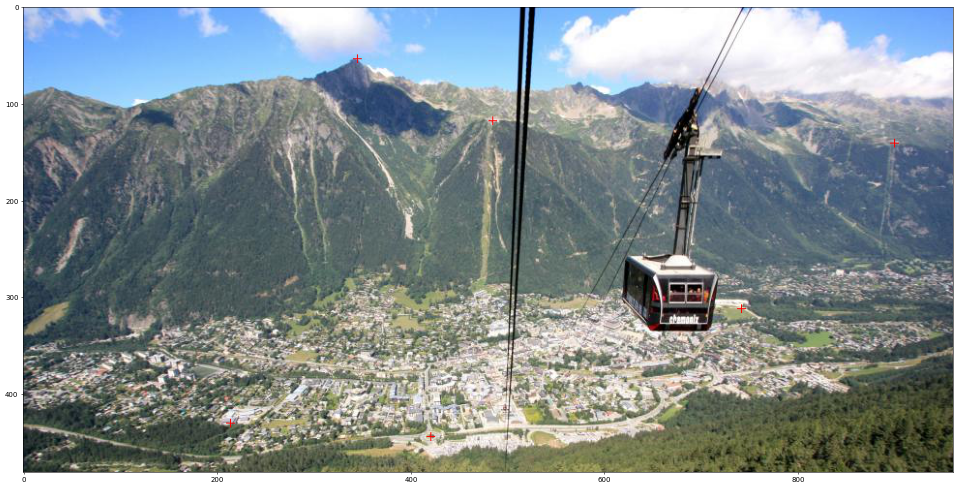

In [4]:
# Annotate picture
pic = Map(casedir / data['picture'])
for p in data['projections']:
    pic.draw_point(p, color='red')
pic.show()

# Search based on lat & lng

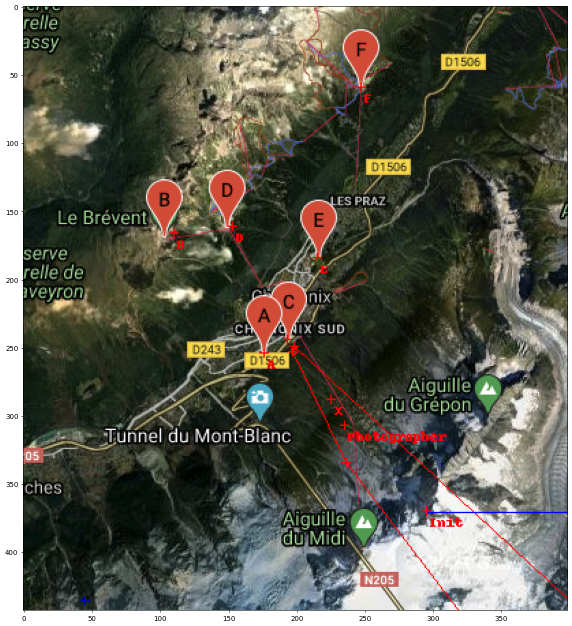

In [5]:
# Display map
map = Map(casedir / data['map'], y_origin="bottom")
map.set_latlng(*data['map_position'])

# Draw the summits on the map
for (p, name) in zip(data['latlngs'], "ABCDEFGHIKLMNOPQRSTUVWXYZ"):
    map.draw_point(p, name, color="red", latlng=True)

# Draw the known position of the photograper if available
if len(data["photographer_latlng"]) != 0:
    map.draw_point(data["photographer_latlng"], "Photographer", color="red", latlng=True)

# Draw the area where the photographer can be
area = photographer_area([map.latlng_to_xy(p) for p in data['latlngs']])
map.draw_area(area, color="red")

# Draw the init of the search
init = barycenter(area)
map.draw_point(init, "Init", color="red")

# Locate the photographer
photograper, error, path, area, init = find_photographer_wsg84(
    latlngs=data['latlngs'],
    projections=[p[0] for p in data['projections']]
)

# Draw photographer & search path
try:
    map.draw_path(path, color="blue", latlng=True)
except:
    pass
map.draw_point(photograper, name="X", color="red", latlng=True)

map.show()

# Search based on (x, y) coordinates

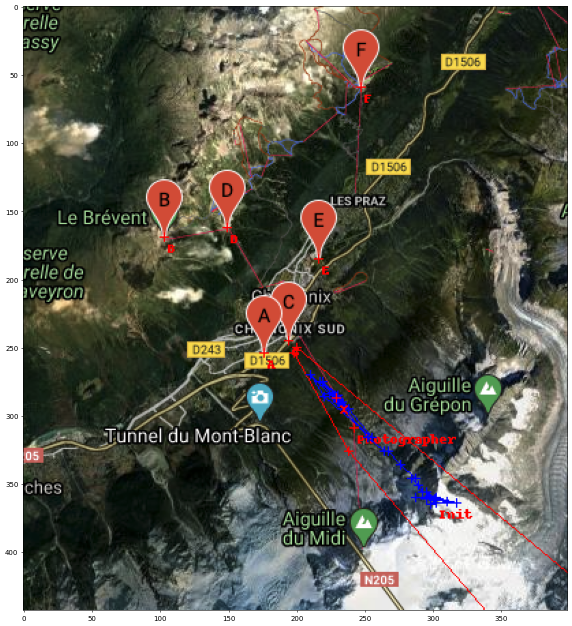

In [6]:
# Display map
map = Map(casedir / data['map'], y_origin="bottom")

# Draw the summits on the map
for (p, name) in zip(data['xy'], "ABCDEFGHIKLMNOPQRSTUVWXYZ"):
    map.draw_point(p, name, color="red")

# Draw the known position of the photograper if available
if len(data["photographer_xy"]) != 0:
    map.draw_point(data["photographer_xy"], "Photographer", color="red")

# Draw the area where the photographer can be
area = photographer_area(data['xy'])
map.draw_area(area, color="red")

# Draw the init of the search
init = barycenter(area)
map.draw_point(init, "Init", color="red")

# Locate the photographer
photograper, error, path, _, _ = find_photographer(
    summits=data['xy'],
    projections=[p[0] for p in data['projections']]
)

# Draw photographer & search path
map.draw_path(path, color="blue")
map.draw_point(photograper, name="X", color="red")

map.show()